In [52]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

In [53]:
df=pd.read_csv("C:/Users/user/Desktop/CapstoneProject/MultipleDiseaseApp/kidney_disease - kidney_disease.csv")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    object 
 17  wc              294 non-null    obj

In [54]:
df = df.replace('?', np.nan)

In [56]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [57]:
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [58]:
df['classification'] = df['classification'].map({'ckd':1, 'notckd':0})

In [59]:
X = df.drop(['classification','id'], axis=1)
y = df['classification']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [61]:
numeric_features = X_train.select_dtypes(exclude='object').columns
categorical_features = X_train.select_dtypes(include='object').columns

In [62]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [63]:
X_train_cat = ohe.fit_transform(X_train[categorical_features])
X_test_cat  = ohe.transform(X_test[categorical_features])

X_train_cat_df = pd.DataFrame(X_train_cat, 
                              columns=ohe.get_feature_names_out(categorical_features),
                              index=X_train.index)

X_test_cat_df = pd.DataFrame(X_test_cat, 
                             columns=ohe.get_feature_names_out(categorical_features),
                             index=X_test.index)


In [64]:
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_num_scaled  = scaler.transform(X_test[numeric_features])

# Convert numeric arrays to dataframe
X_train_num_df = pd.DataFrame(X_train_num_scaled, 
                              columns=numeric_features,
                              index=X_train.index)

X_test_num_df = pd.DataFrame(X_test_num_scaled, 
                             columns=numeric_features,
                             index=X_test.index)


In [65]:
X_train_final = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_final  = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

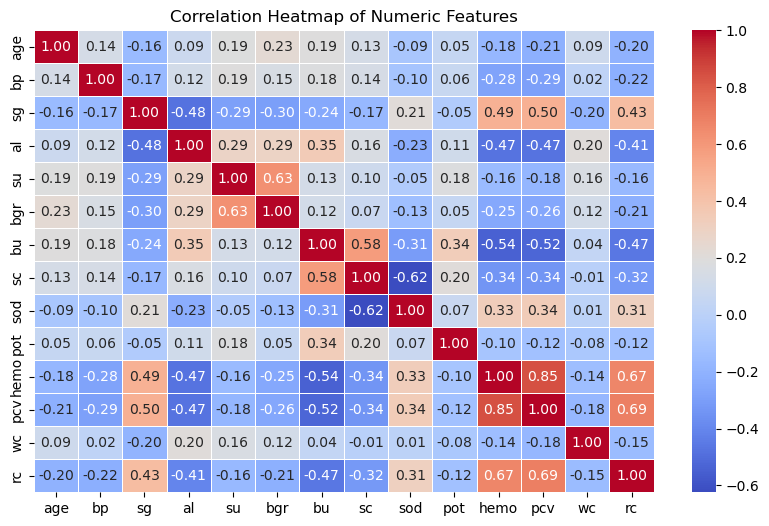

In [28]:
numeric_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
                'hemo', 'pcv', 'wc', 'rc']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

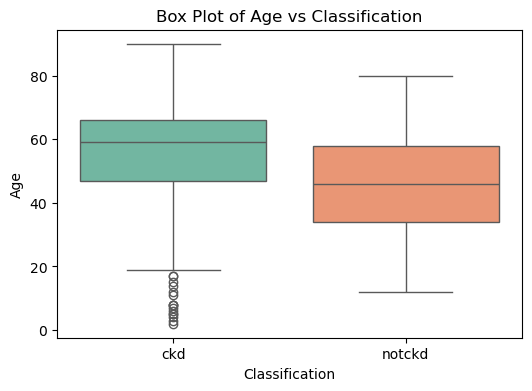

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='classification', y='age', data=df, palette='Set2')
plt.title('Box Plot of Age vs Classification')
plt.xlabel('Classification')
plt.ylabel('Age')
plt.show()

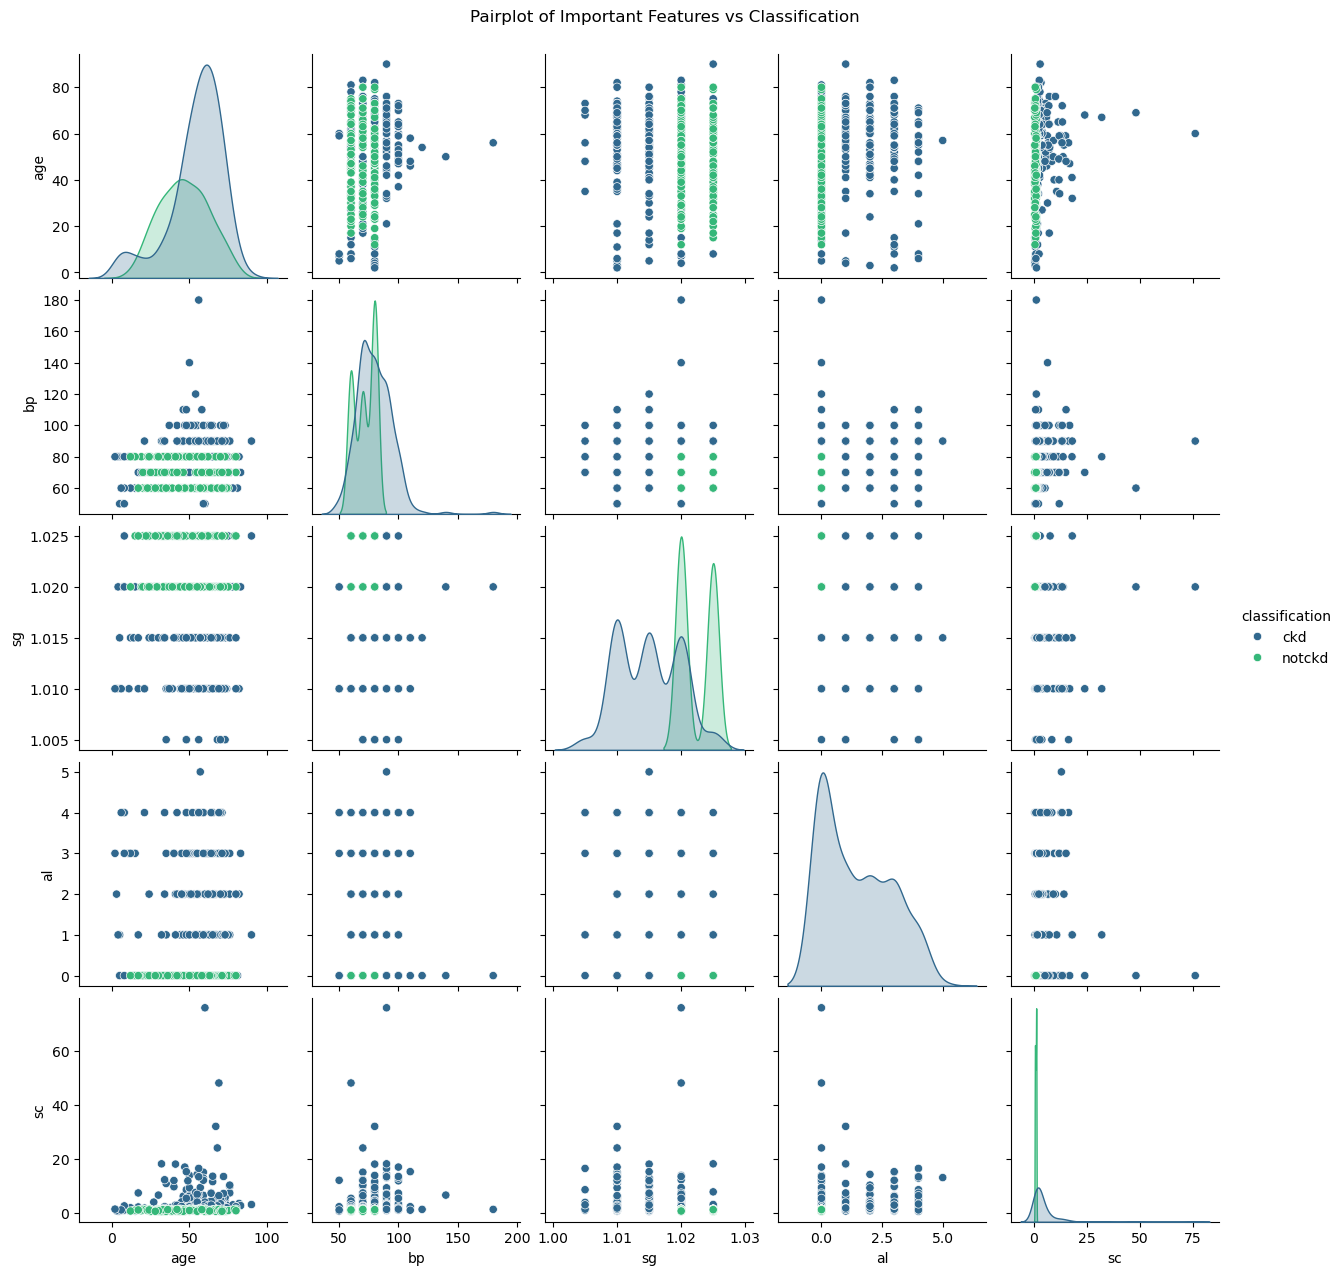

In [30]:
important_features = ['age', 'bp', 'sg', 'al', 'sc']
sns.pairplot(df[important_features + ['classification']], hue='classification', palette='viridis')
plt.suptitle('Pairplot of Important Features vs Classification', y=1.02)
plt.show()

In [66]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=300),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

results = {}
trained_models = {}

In [67]:
for name, model in models.items():
    model.fit(X_train_final, y_train)
    pred = model.predict(X_test_final)
    acc = accuracy_score(y_test, pred)
    
    results[name] = acc
    trained_models[name] = model
    
    print(f"{name} Accuracy: {acc}")

Random Forest Accuracy: 1.0
KNN Accuracy: 0.9875
Logistic Regression Accuracy: 1.0


In [68]:
best_model_name = max(results, key=results.get)
best_model = trained_models[best_model_name]

print("\nBEST MODEL:", best_model_name)
print("BEST ACCURACY:", results[best_model_name])


with open("best_ckd_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("\nSaved best model as best_ckd_model.pkl")


BEST MODEL: Random Forest
BEST ACCURACY: 1.0

Saved best model as best_ckd_model.pkl
